In [1]:
###################################################################################################
#
# DM_vs_R_plot.py 	                (c) Ian Williams, Adnan Khan, Matt McQuinn
#     				    	        ianw89@live.com
#
###################################################################################################

from cgmbrush.cgmbrush import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

M_chosen = [5,12,18]
provider = BolshoiProvider()

# Specify resolution
resolution = 32
grid_size = resolution*1024

load_data = True
load_DM_vs_rad = True
load_masks = True

series = []
date = '2021-11-01'

config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=1)
config.datestamp = date
vir_rad_ar = config.get_virial_radii()
avg_mass_ar = config.get_halo_masses()

print ("Masses chosen: ")
print (avg_mass_ar[M_chosen[0]])
print (avg_mass_ar[M_chosen[1]])
print (avg_mass_ar[M_chosen[2]])

config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
STH_DMvsR = config.DM_vs_R1
STH_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1,config.mask_profiles,'3D Tophat','red'))

config = Configuration(SphericalTophatProfile(), 2, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
STH_2_DMvsR = config.DM_vs_R1
STH_2_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, '3D Tophat 2$R_{vir}$', 'orange'))

config = Configuration(FireProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
fire_DMvsR = config.DM_vs_R1
fire_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'FIRE', 'green'))

config = Configuration(NFWProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
NFW_DMvsR = config.DM_vs_R1
NFW_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'NFW', 'blue'))

config = Configuration(PrecipitationProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
P_DMvsR = config.DM_vs_R1
P_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'Precipitation', 'c'))

Masses chosen: 
190921985964.11972
5221032334878.73
88496393458863.06


In [2]:

def error_bar_DMvsRad(sd,N_frb,radius_array,Rvir,avg_frbs):
    """avg_frbs is how many halos of this size an FRB goes through; see McQuinn 2014."""
    error_bar = np.zeros([len(radius_array)])
    for i in range(1,len(radius_array)):
        error_bar[i-1] = sd/(np.sqrt(avg_frbs*N_frb*((radius_array[i]**2-radius_array[i-1]**2)/Rvir**2)))
    
    return error_bar

def plot_DM_vs_Rad(x_axis, mean_DM, axis, massbin, series, plot_masks):
    
    # axis.set_title('Mass = %.1E' % Decimal(df[2][massbin]),fontsize=14)
    
    for data in series:
        axis.semilogx(x_axis,data[0][massbin,:]-mean_DM,'-', label=data[2],lw=5,color=data[3])

        if plot_masks:
            axis.semilogx(x_axis,data[1][massbin,:],'--', lw=2,color=data[3])

def plot_error_bars(r_star_ar, axis, *lines):
    for line in lines:
        axis.semilogx(r_star_ar*1000,line[0],ls='--',drawstyle='steps',color=line[1],lw=line[2])


def make_DM_vs_Rad_profiles_plots(series, error: bool, x_start, x_end):

    orig_den_256 = provider.get_density_field(0, 256)

    # Mean DM of single box
    mean_DM=np.mean(orig_den_256)

    # dimension of the small grid around the halo we want to crop
    trim_dim=int((10*resolution))

    # Radial extent of the plots in Mpc
    extent = (L/grid_size)*(trim_dim/2)

    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 30
    XBIG_SIZE = 20

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    MpctoKpc =1000
    hspace = 0.015

    DM_Rad_fig, DM_Rad_axs = plt.subplots(3, 1,
                            gridspec_kw={'hspace': hspace, 'wspace': .2},figsize=(20,30))


    # X-axis: mask grid has a diagonal of length sqrt(2) that needs to be factored in after the profile is calculated
    x_axis = np.sqrt(2)*MpctoKpc*np.linspace(0, extent, series[0][0].shape[1])

    plot_DM_vs_Rad(x_axis, mean_DM, DM_Rad_axs[0], M_chosen[0], series, not error)
    plot_DM_vs_Rad(x_axis, mean_DM, DM_Rad_axs[1], M_chosen[1], series, not error)
    plot_DM_vs_Rad(x_axis, mean_DM, DM_Rad_axs[2], M_chosen[2], series, not error)

    if error:

        ### For error bar plot
        # Variances should be extracted from the redshift plots at redshift =0.5 TODO update
        var_STH_2 = 173
        var_STH2_2 = 141
        var_NFW_2 = 451
        var_fire_2 = 226
        var_P_2 = 215

        sd_incl_host = np.sqrt(var_fire_2**2 + 300**2)

        #r_star_ar_1 = np.logspace(np.log10(vir_rad_ar[M_chosen[0]]/25),np.log10(3*vir_rad_ar[M_chosen[0]]),10)
        #r_star_ar_2 = np.logspace(np.log10(vir_rad_ar[M_chosen[1]]/25),np.log10(3*vir_rad_ar[M_chosen[1]]),10)
        r_star_ar = np.logspace(np.log10(vir_rad_ar[M_chosen[2]]/30),np.log10(4*vir_rad_ar[M_chosen[2]]),10)

        num_FRB = 100

        error_100_11M_STH = error_bar_DMvsRad(var_STH_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[0]],1)
        error_100_11M_fire = error_bar_DMvsRad(var_fire_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[0]],1)
        #error_100_11M_P = error_bar_DMvsRad(var_P_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[0]],4)

        error_100_12M_STH = error_bar_DMvsRad(var_STH_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[1]],1)
        error_100_12M_fire = error_bar_DMvsRad(var_fire_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[1]],1)
        #error_100_12M_P = error_bar_DMvsRad(var_P_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[1]],2)

        error_100_13M_STH = error_bar_DMvsRad(var_STH_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[2]],0.6)
        error_100_13M_fire = error_bar_DMvsRad(var_fire_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[2]],0.6)
        #error_100_13M_P = error_bar_DMvsRad(var_P_2,num_FRB,r_star_ar,vir_rad_ar[M_chosen[2]],0.2)

        # error when host halo DM is included
        error_100_12M_fire_host = error_bar_DMvsRad(sd_incl_host,100,r_star_ar,vir_rad_ar[M_chosen[1]],2)

        plot_error_bars(r_star_ar, DM_Rad_axs[0], (error_100_11M_STH, 'red', 4), (error_100_11M_fire, 'green', 4))
        plot_error_bars(r_star_ar, DM_Rad_axs[1], (error_100_12M_STH, 'red', 4), (error_100_12M_fire, 'green', 4), (error_100_12M_fire_host, 'blue', 2))
        plot_error_bars(r_star_ar, DM_Rad_axs[2], (error_100_13M_STH, 'red', 4), (error_100_13M_fire, 'green', 4))

    # ticks

    # ax.xaxis.grid(True, which='minor')
    # DM_Rad_axs[0].xaxis.grid(axis='x', which='minor', bottom=True)

    # DM_Rad_axs[0].tick_params(axis='x', which='minor', bottom=True)
    # DM_Rad_axs[1].tick_params(axis='x', which='minor', bottom=True)

    # DM_Rad_axs[0].tick_params(axis='x', which='minor',fontsize=10)
    # DM_Rad_axs[2].xaxis.set_tick_params(width=5)

    DM_Rad_axs[0].tick_params('both', length=10, width=4, which='major')
    DM_Rad_axs[0].tick_params('both', length=10, width=4, which='minor')
    DM_Rad_axs[1].tick_params('both', length=10, width=4, which='major')
    DM_Rad_axs[1].tick_params('both', length=10, width=4, which='minor')
    DM_Rad_axs[2].tick_params('both', length=10, width=4, which='major')
    DM_Rad_axs[2].tick_params('both', length=10, width=4, which='minor')


    # legend
    DM_Rad_axs[0].legend(loc='right',prop={'size':28}, frameon=False)
    # DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
    DM_Rad_axs[1].set_ylabel('DM - <DM> [pc cm$^{-3}$]',fontsize=50)
    # DM_Rad_axs[2].set_ylabel('DM - <DM> [pc cm$^{-3}$]',fontsize=30)
    DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=50)

    # Adding virial radii
    DM_Rad_axs[0].axvline(MpctoKpc*(vir_rad_ar[M_chosen[0]]), color='k', linestyle='--', linewidth=1)
    DM_Rad_axs[1].axvline(MpctoKpc*(vir_rad_ar[M_chosen[1]]), color='k', linestyle='--', linewidth=1)
    DM_Rad_axs[2].axvline(MpctoKpc*(vir_rad_ar[M_chosen[2]]), color='k', linestyle='--', linewidth=1)

    # x and y axis limits
    ymax1 = 129
    ymax2 = 309
    ymax3 = 799
    DM_Rad_axs[0].set_ylim([0, ymax1])
    DM_Rad_axs[0].set_xlim([x_start, x_end])
    DM_Rad_axs[1].set_ylim(ymin=0,ymax=ymax2)
    DM_Rad_axs[1].set_xlim([x_start, x_end])
    DM_Rad_axs[2].set_ylim(ymin=0,ymax=ymax3)
    DM_Rad_axs[2].set_xlim([x_start, x_end])

    # Rectangular patch for region too far inside resolution limit
    #DM_Rad_axs[0].add_patch(Rectangle((0,0), 45, 130,facecolor='yellow'))
    #DM_Rad_axs[1].add_patch(Rectangle((0,0), 45, 399,facecolor='yellow'))
    #DM_Rad_axs[2].add_patch(Rectangle((0,0), 45, 1500,facecolor='yellow'))

    # mass labels
    DM_Rad_axs[0].text(x_end*0.5, ymax1*0.85, r'$10^{11} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
    DM_Rad_axs[1].text(x_end*0.5, ymax2*0.85, r'$10^{12} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
    DM_Rad_axs[2].text(x_end*0.5, ymax3*0.85, r'$10^{13} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)

    # DM_Rad_axs[0].rc('xtick', labelsize=35)    # fontsize of the tick labels
    # # plt.rc('ytick', labelsize=35)    # fontsize of the tick labels

    errstr = ''
    if error:
        errstr = '_error'
    name = 'DMvsRad_profiles_{}_{}{}.pdf'.format(resolution, x_end, errstr)

    saveFig(name, DM_Rad_fig, bbox_inches='tight')


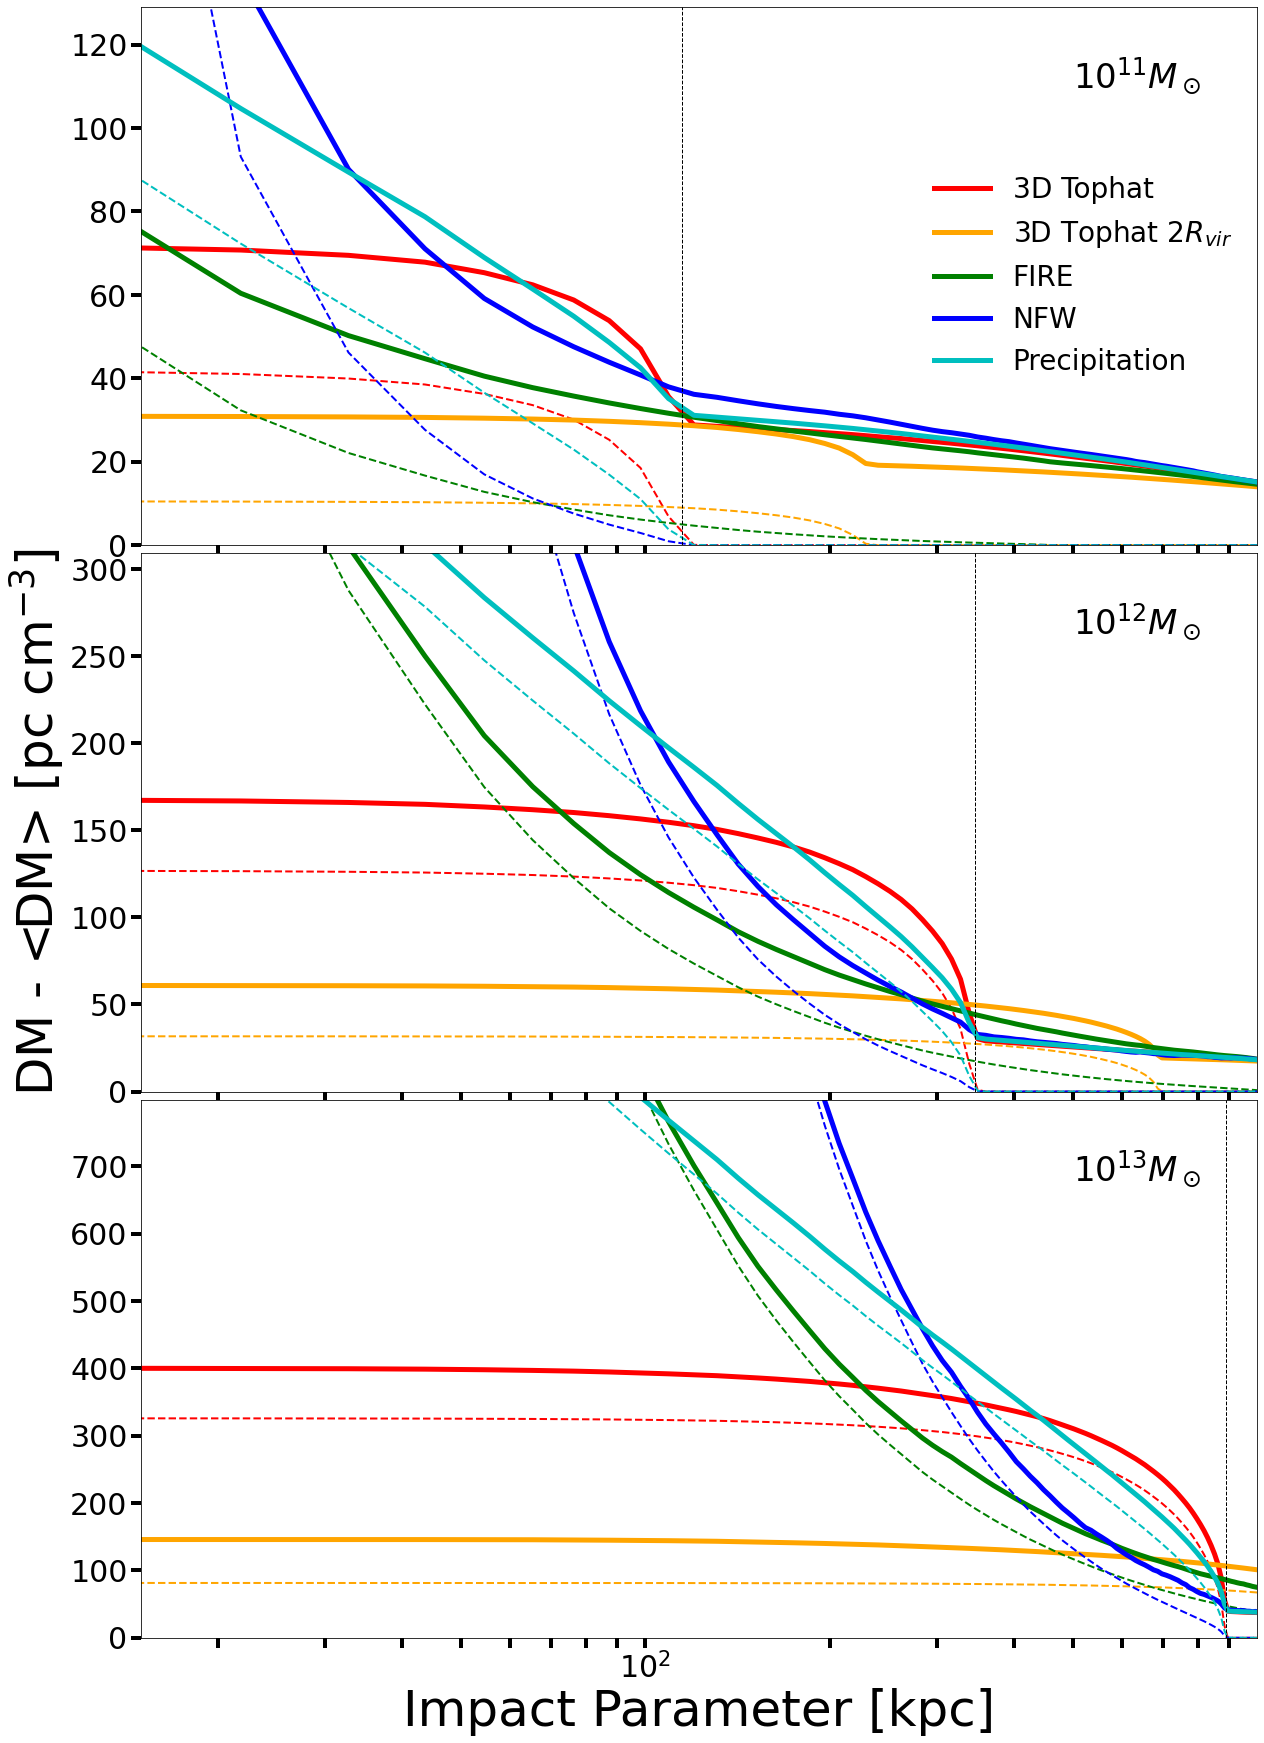

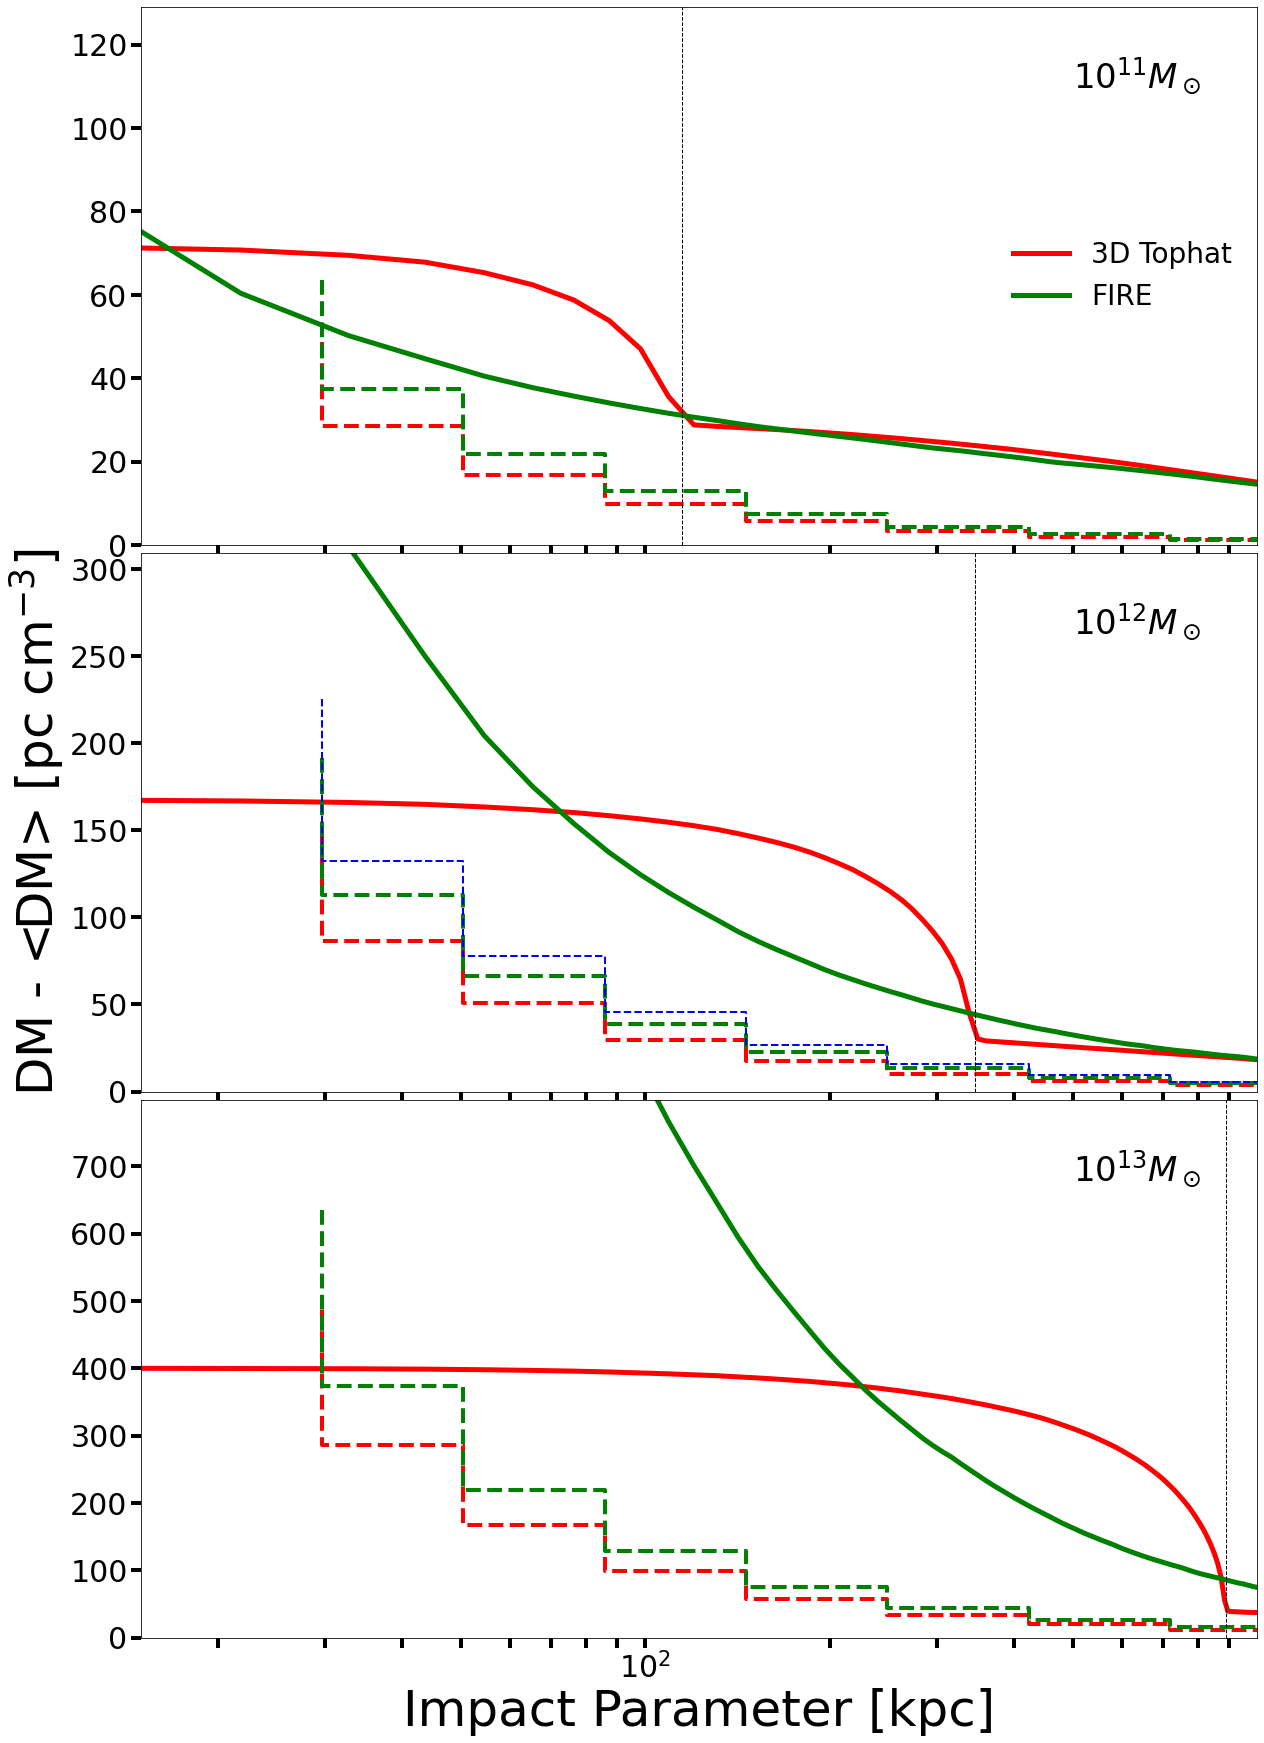

In [3]:


make_DM_vs_Rad_profiles_plots(series, False, 15, 999)
make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 999)

#make_DM_vs_Rad_profiles_plots(series, False, 15, 899)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 899)

#make_DM_vs_Rad_profiles_plots(series, False, 15, 799)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 799)